In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Conectar con la base de datos
conx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='vey42s7d',
    database='new_db_transactions'
)

#Obtener los nombres de todas las tablas
cursor = conx.cursor()
db = {}

#Obtener los nombres de todas las tablas
cursor.execute('SHOW TABLES;')
table_names = [table[0] for table in cursor.fetchall()] # Extraer los nombres como una lista

#Recorrer cada tabla y asignar el contenido a un diccionario distinto
for table in table_names:
    query = f'SELECT * FROM {table}'
    df = pd.read_sql(query, con=conx)
    #un dataframe para cada tabla
    db[table] = df

#Cerrar conexiones
cursor.close()
conx.close()

C:\Users\tinke\AppData\Local\Temp\ipykernel_10108\4263944531.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=conx)


In [3]:
table_names

['companies',
 'credit_card_status',
 'credit_cards',
 'products',
 'transaction_products',
 'transactions',
 'users']

In [4]:
# Asignar nombre más corto a cada df
companies = db['companies']
cc_status = db['credit_card_status']
credit_cards = db['credit_cards']
products = db['products']
transaction_products = db['transaction_products']
transactions = db['transactions']
users = db['users']

#### exercici 1 : Una variable numèrica 

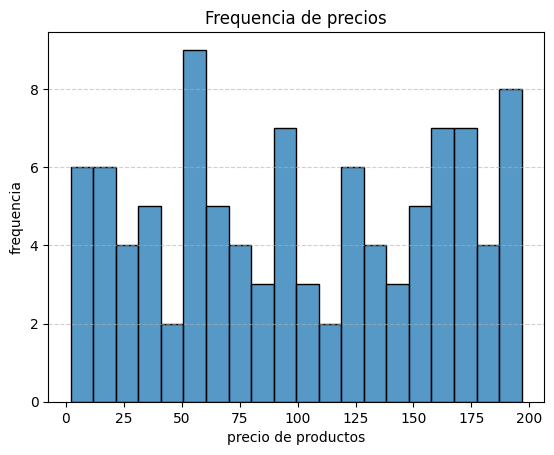

In [5]:
sns.histplot(data=products, x='price', bins=20)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlabel('precio de productos')
plt.ylabel('frequencia')
plt.title('Frequencia de precios')
plt.show();


Para una variable numérica el histograma es el gráfico adecuado por la facilidad de leer la información. En este caso tenemos la frequencia de precios de los productos y observamos que los productos con mayor frequencia de >= 8 son los que tienen un precio approximado entre 50$-60$ y 185$-200$ seguidos por los productos con precios aproximados entre 85$-100$ y 160$-175$. 

#### exercici 2 : Dues variables numèriques

In [6]:
transactions['sold_items'] = transactions['product_ids'].apply(lambda x: len(str(x).split(',')))
transactions.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,sold_items
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,3
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,3
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.2227,-129.0500,4
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593,-100.5560,3
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,2


In [7]:
from datetime import datetime

users['birth_date'] = pd.to_datetime(users['birth_date'])
hoy = pd.to_datetime('today')
users['age'] = users['birth_date'].apply(lambda x: hoy.year - x.year - ((hoy.month, hoy.day) < (x.month, x.day)))
users.head()

,id,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,Lowell,73544,348-7818 Sagittis St.,39
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Des Moines,59464,903 Sit Ave,33
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Columbus,56518,736-2063 Tellus St.,27
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Kailua,77417,Ap #545-2244 Erat. Rd.,36
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Sandy,31564,341-2821 Ultrices Av.,26


In [8]:
trans_users_df = pd.merge(
    users,
    transactions,
    left_on='id',
    right_on='user_id',
    how='inner'
).reset_index(drop=True)

In [9]:
trans_users_df=trans_users_df[['id_x','name','surname','birth_date','country','city','age','id_y','business_id', 'timestamp', 'amount', 'declined', 'product_ids','sold_items']]
trans_users_df=trans_users_df.rename(columns={'id_x': 'id_user', 'id_y':'transaction_id'})
trans_users_df.head()

,id_user,name,surname,birth_date,country,city,age,transaction_id,business_id,timestamp,amount,declined,product_ids,sold_items
0,60,Roth,Cook,1996-11-23,United States,Aurora,28,8BCE9908-6D44-B7DB-D363-D468A2DF3A25,b-2362,2022-02-16 21:45:08,156.23,0,"37, 67, 23, 83",4
1,61,Duncan,Romero,1990-02-04,United States,Hilo,35,A2CD7827-4C8D-9E71-8549-262833307BF1,b-2362,2021-05-25 14:06:45,460.82,0,"31, 97, 73",3
2,62,Phyllis,Holt,1987-06-07,United States,Newark,38,44D0BBB1-975E-86AA-75DA-BDAFED65F368,b-2362,2021-07-20 08:47:44,133.39,0,29,1
3,63,Beverly,Burt,1996-12-12,United States,Pittsburgh,28,DA7A5D76-448A-678E-4836-465C8B963F4E,b-2362,2022-02-19 17:58:33,82.43,0,83,1
4,64,Irma,Whitehead,1988-02-14,United States,Norman,37,E3E941D3-0866-2E6F-85D7-A2F21E79A215,b-2362,2021-09-23 10:02:57,471.47,0,"7, 31, 29",3


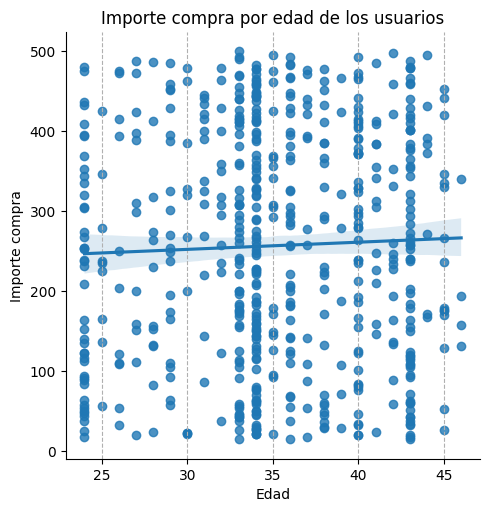

In [10]:
sns.lmplot(data=trans_users_df, x='age', y='amount'
)

plt.grid(axis='x', linestyle='--')
plt.xlabel('Edad')
plt.ylabel('Importe compra')
plt.title('Importe compra por edad de los usuarios')
plt.show();

El gráfico de dispersión nos permite visualizar de forma clara la relación entre dos variables numéricas y observar si hay una tendencia entre ellas. En este caso se observa una tendencia ligeramente positiva: los usuarios mayores tienden a realizar compras de un importe mayor. Además se observa que los usuarios entre 33-34 años realizan más compras y cubriendo todo el rango de valores de importe de compra.

#### Exercici 3: Una variable categòrica 

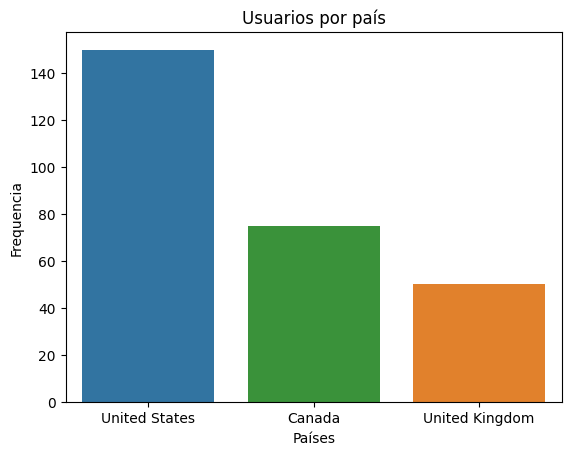

In [11]:
sns.countplot(data=users, x='country', hue='country', order=users['country'].value_counts().index)

plt.xlabel('Países')
plt.ylabel('Frequencia')
plt.title('Usuarios por país')
plt.show();

Para variables categóricas, el gráfico de barras es el más utilizado. Obesrvamos la cantidad de usuarios por país, con Estados Unidos teniendo la mayoria de los usuarios.

#### Exercici 4: Una variable categòrica i una numèrica 

In [12]:
ex4 = trans_users_df.groupby('country')[['amount']].mean().reset_index()
ex4

,country,amount
0,Canada,253.559375
1,United Kingdom,245.424032
2,United States,267.251792


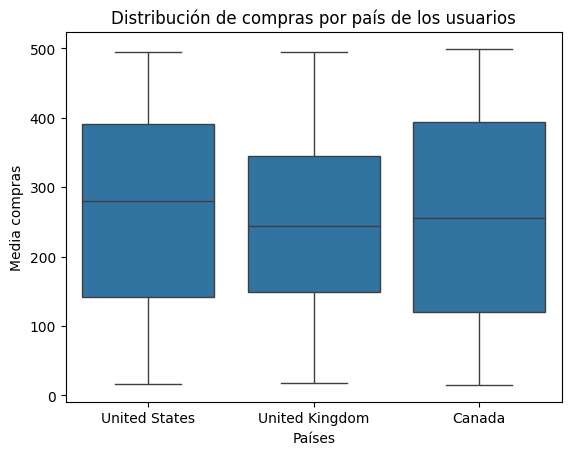

In [13]:
sns.boxplot(data=trans_users_df, x='country', y='amount')

plt.xlabel('Países')
plt.ylabel('Media compras')
plt.title('Distribución de compras por país de los usuarios')
plt.show()

El boxplot muestra la distribución del importe de compra por los usuarios de cada país. Estados Unidos muestra una distribución más dispersa y la mediana más alta que los otros países. Inglaterra y Canadá muestran una distribución similar, con Inglaterra presentando una mediana ligeramente más baja que Canadá. 

#### Exercici 5: Dues variables categòriques 

In [14]:
ex5= pd.crosstab(trans_users_df['country'], trans_users_df['declined']).reset_index()
ex5 = ex5.melt(id_vars='country', var_name='declined', value_name='count')
ex5

,country,declined,count
0,Canada,0,265
1,United Kingdom,0,62
2,United States,0,173
3,Canada,1,87
4,United Kingdom,1,0
5,United States,1,0


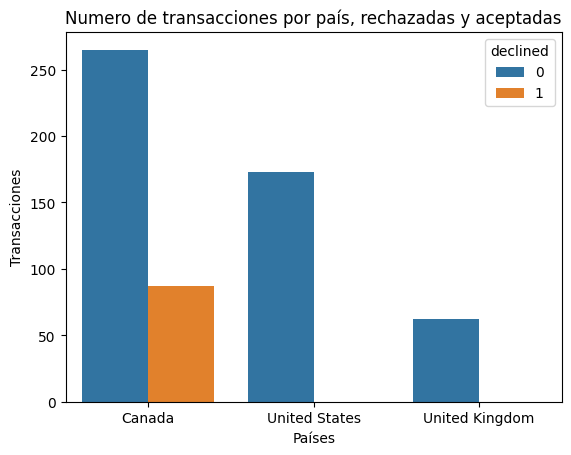

In [15]:
ex5=ex5.sort_values('count', ascending=False)
sns.barplot(data=ex5, x='country', y='count', hue='declined')

plt.xlabel('Países')
plt.ylabel('Transacciones')
plt.title('Numero de transacciones por país, rechazadas y aceptadas')
plt.show();

En este gráfico de barras podemos observar el número total de transacciones por país, indicando si la transacción ha sido rechazada o no. Canadá es el único país que muestra transacciones rechazadas y la vez el mayor número de transacciones completadas (más de 250). Estados Unidos muestra un total número de transacciones de 175 aprox., todas completadass e Inglaterra muestra el menor número de transacciones, 75 aprox.  

#### exercici 6 : Tres variables   

In [16]:
ex6 = trans_users_df.groupby(['country','declined'])['amount'].sum().reset_index()
ex6=ex6.sort_values('amount', ascending=False)
ex6

,country,declined,amount
0,Canada,0,68054.74
3,United States,0,46234.56
1,Canada,1,21198.16
2,United Kingdom,0,15216.29


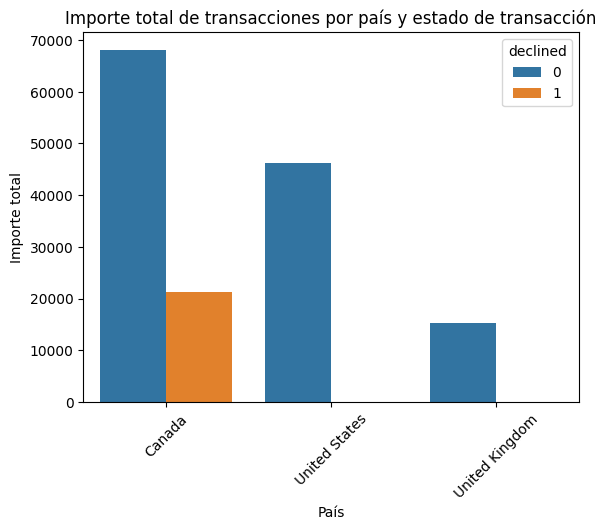

In [17]:
sns.barplot(data=ex6, x='country', y='amount', hue='declined')

plt.title("Importe total de transacciones por país y estado de transacción")
plt.xticks(rotation=45)
plt.ylabel("Importe total")
plt.xlabel("País")
plt.show();

El gráfico de barras muestra el importe total gastado por cada país, separando las transacciones realizadas de las transacciones rechadas. Ya hemos visto que Canadá es el único país que cuenta con transacciones rechazadas cuyo importe total es de 20000 $. Canadá es el país donde los usuarios más gastan en compras, seguido por Estados Unidos e Inglaterra.

#### exercici 7 : Graficar un pairplot

In [18]:
#1. age, sold_items, amount, declined
ex7 = trans_users_df[['age', 'sold_items', 'amount', 'declined']].reset_index(drop=True)
ex7

,age,sold_items,amount,declined
0,28,4,156.23,0
1,35,3,460.82,0
2,38,1,133.39,0
3,28,1,82.43,0
4,37,3,471.47,0
...,...,...,...,...
582,43,1,71.55,0
583,43,2,356.09,1
584,43,1,266.09,0
585,43,4,119.36,1


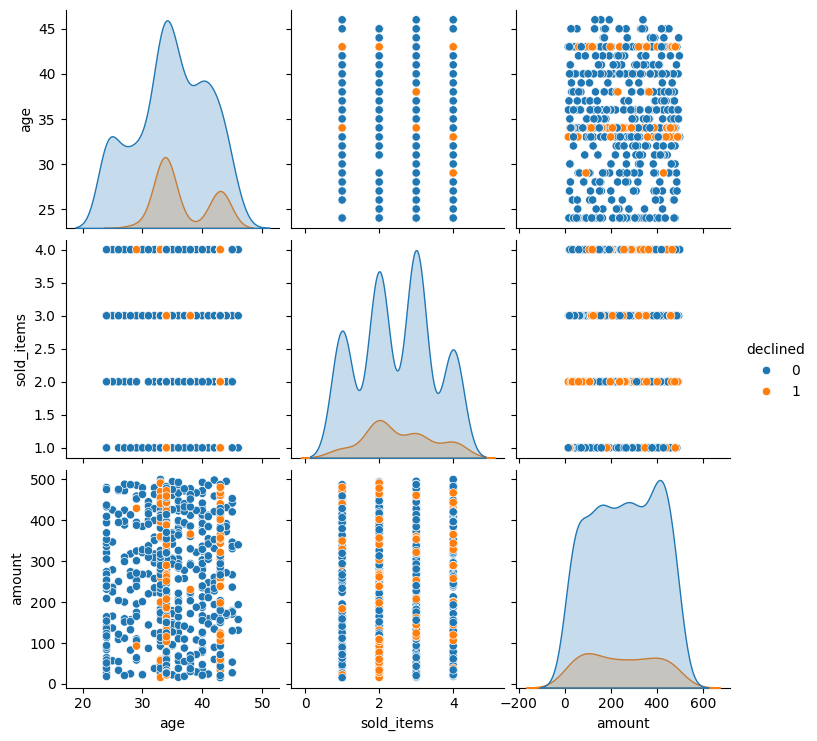

In [19]:
sns.pairplot(ex7, hue='declined');

#se puede añadir diferente tipo de gráfico por encima de la diagonal con variable.map_upper(ej. sns.kdeplot) o map_lower

El pairplot es uno de los gráficos que nos permite revisar las relaciones entre variables numéricas.Podemos indicar que la mayoría de las transacciones las realiza el grupo de edad 30-45 años (pero con transacciones rechazadas incluidas). POr otro lado, el grupo de usuarios con edad de 25 años,  realizan muchas transacciones, en todo el rango de precios y todas exitosas.

No hay una correlación visible entre el total de productos comprados y el importe total gastado. Sin embargo, se observa que en las transacciones de 2 productos e importes más bajos se concentran la mayoría de transacciones rechazadas.

## Nivell 2

#### exercici 1 : Correlació de totes les variables numèriques

In [20]:
trans_prod_df=pd.merge(
    products,
    transaction_products,
    left_on='id',
    right_on='product_id',
    how='inner'
)

trans_prod_user_df=pd.merge(
    trans_prod_df,
    trans_users_df,
    on='transaction_id',
    how='inner'
)


In [21]:
trans_prod_user_df.columns

Index(['id', 'product_name', 'price', 'colour', 'weight', 'warehouse_id',
       'transaction_id', 'product_id', 'id_user', 'name', 'surname',
       'birth_date', 'country', 'city', 'age', 'business_id', 'timestamp',
       'amount', 'declined', 'product_ids', 'sold_items'],
      dtype='object')

In [22]:
numerico_df = trans_prod_user_df[['price', 'weight', 'amount', 'sold_items']]
correlation = numerico_df.corr()
correlation

,price,weight,amount,sold_items
price,1.000000,0.194816,0.011335,-0.025634
weight,0.194816,1.000000,-0.014904,-0.021464
amount,0.011335,-0.014904,1.000000,0.003038
sold_items,-0.025634,-0.021464,0.003038,1.000000


<Axes: >

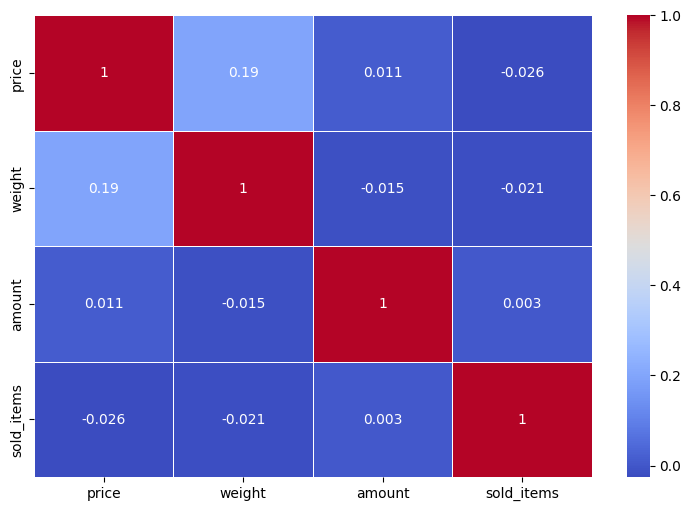

In [23]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation, cmap='coolwarm',annot=True, linewidths=.5, ax=ax)

#mirar como revisar test shapiro para saber si distr. normal y saber qué metodo aplicar en corr, pearson, spearman

El heatmap nos permite identificar de forma visual la intensidad de las correlaciones entre variables numéricas. En este caso, no se observan correlaciones fuertes con la relación más destacada la correlación moderada entre precio y peso, mientras que el resto de combinaciones muestran correlaciones muy bajas, cercanas a cero.

#### exercici 2 : Implementa un jointplot

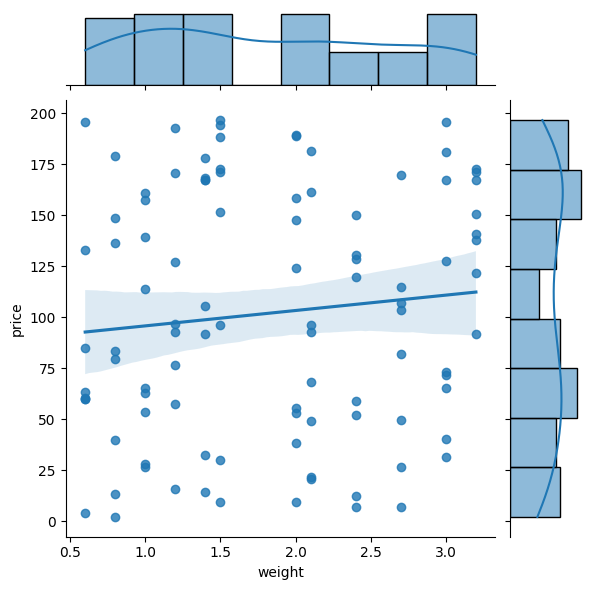

In [24]:
sns.jointplot(data=products, x='weight', y='price', kind='reg')
#kind=hist en medio saldrán barras

El gráfico muestra una relación moderamente positiva entre peso y precio de los productos: a medida que el peso aumenta, el precio tiende a subir ligeramente. Sin embargo, la alta dispersión de los puntos indica que esta relación es muy débil y que hay muchos productos de bajo peso con precios altos y viceversa.

## Nivell 3

#### exercici 1 : Implementa un violinplot combinat amb un altre tipus de gràfic

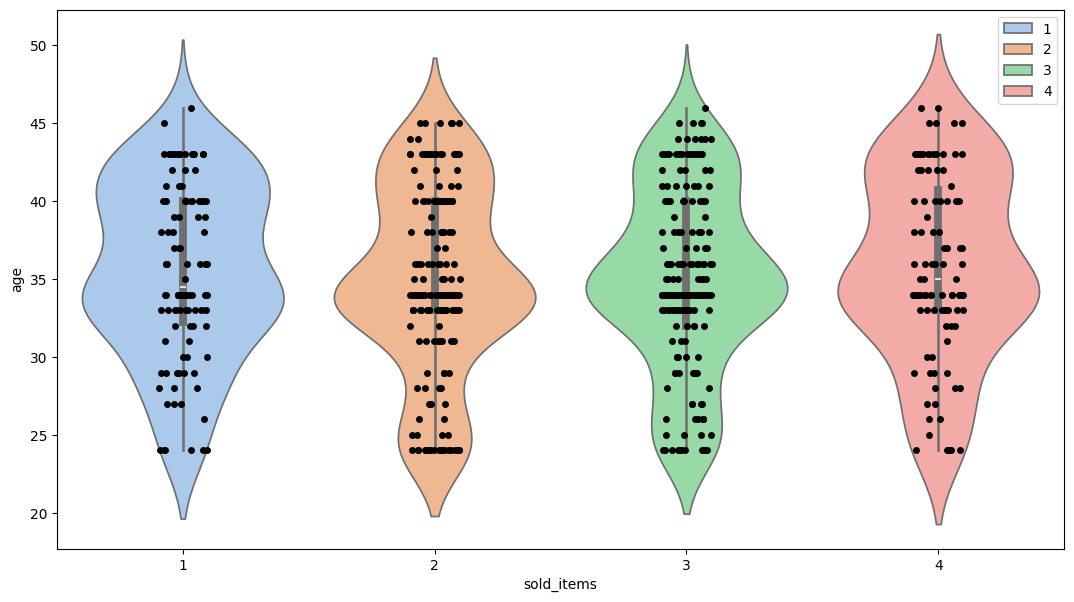

In [25]:
plt.figure(figsize=(13,7))

sns.violinplot(x='sold_items', y='age', data=trans_users_df, hue='sold_items', palette='pastel')
#sns.swarmplot(x='sold_items', y='age', data=trans_users_df)
sns.stripplot(x='sold_items', y='age', data=trans_users_df, color='black')
plt.show();

Cada violín representa la distribución de las edades de los usaurios que compraron x número de productos.
La edad más común, independiente del número de productos comprados, es entre 30 y 40 approx. pero la distribución es bastante similar en todas las cantidades de productos vendidas. Esto indica que la edad de los usuarios no influye el total de productos comprado.

#### exercici 2 : Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

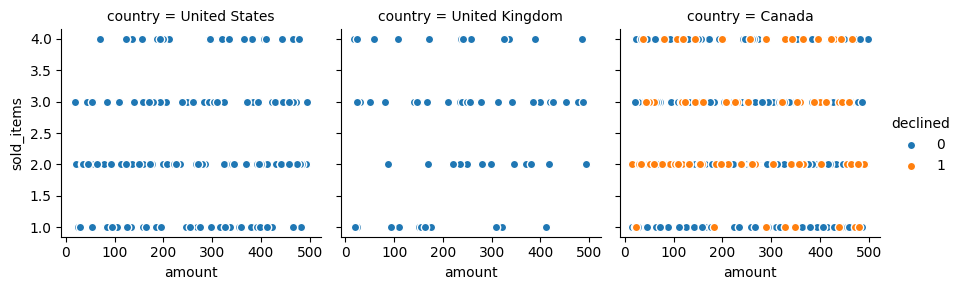

In [26]:
n3ex2 = sns.FacetGrid(trans_users_df, col ="country",  hue ="declined")

n3ex2.map(plt.scatter, "amount", "sold_items", edgecolor ="w").add_legend()

plt.show()

Este FacetGrid muestra la comparación entre los países de los usuarios (Estados Unidos, Reino Unido y Canadá) en relación con el total de productos vendidos y el monto de la compra. Además se indica si cada transacción fue rechazada o no. Con este gráfico podemos visualizar múltiples variables a la vez para comparar los resultados. 
Estados Unidos y Reino Unido tienen transacciones exitosas, con Canadá registrando todas las rechazadas. No se observa una relación entre articulos vendidos e importe total de compra pero sí que la frequencia de transacciones de 2 o 3 productos es mayor. 